In [6]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from cryptocmd import CmcScraper


In [7]:
# initialise scraper from the satarting of 2021 to today
scraper = CmcScraper("BTC", "01-01-2021", "31-12-2021")

In [8]:
# Pandas dataFrame for the same data and removing unwanted columns
btc =  scraper.get_dataframe().drop(columns=['Open','High','Low','Volume','Market Cap'])
btc['Date'] = pd.to_datetime(btc['Date']).dt.date
btc = btc.round(2)
btc

,Date,Close
0,2021-12-31,46306.45
1,2021-12-30,47178.13
2,2021-12-29,46444.71
3,2021-12-28,47588.85
4,2021-12-27,50640.42
...,...,...
360,2021-01-05,33992.43
361,2021-01-04,31971.91
362,2021-01-03,32782.02
363,2021-01-02,32127.27


In [9]:
# Sorting and setting up date as an index
btc = btc.sort_index(ascending= False)
btc.set_index('Date', inplace= True)
btc

,Close
Date,
2021-01-01,29374.15
2021-01-02,32127.27
2021-01-03,32782.02
2021-01-04,31971.91
2021-01-05,33992.43
...,...
2021-12-27,50640.42
2021-12-28,47588.85
2021-12-29,46444.71


In [10]:
# Check if any null value is present
btc.isnull().sum()

Close    0
dtype: int64

In [11]:
# Calculating dailyReturns
btc_dly_ret= btc.pct_change().round(5)
btc_dly_ret


,Close
Date,
2021-01-01,NaN
2021-01-02,0.09373
2021-01-03,0.02038
2021-01-04,-0.02471
2021-01-05,0.06320
...,...
2021-12-27,-0.00333
2021-12-28,-0.06026
2021-12-29,-0.02404


In [12]:
# Rename column into daily returns
btc_dly_ret = btc_dly_ret.rename(columns={'Close': 'Daily Returns'})
btc_dly_ret

,Daily Returns
Date,
2021-01-01,NaN
2021-01-02,0.09373
2021-01-03,0.02038
2021-01-04,-0.02471
2021-01-05,0.06320
...,...
2021-12-27,-0.00333
2021-12-28,-0.06026
2021-12-29,-0.02404


In [13]:
#Dropping null values
btc_dly_ret.dropna()

,Daily Returns
Date,
2021-01-02,0.09373
2021-01-03,0.02038
2021-01-04,-0.02471
2021-01-05,0.06320
2021-01-06,0.08331
...,...
2021-12-27,-0.00333
2021-12-28,-0.06026
2021-12-29,-0.02404


<AxesSubplot:xlabel='Date'>

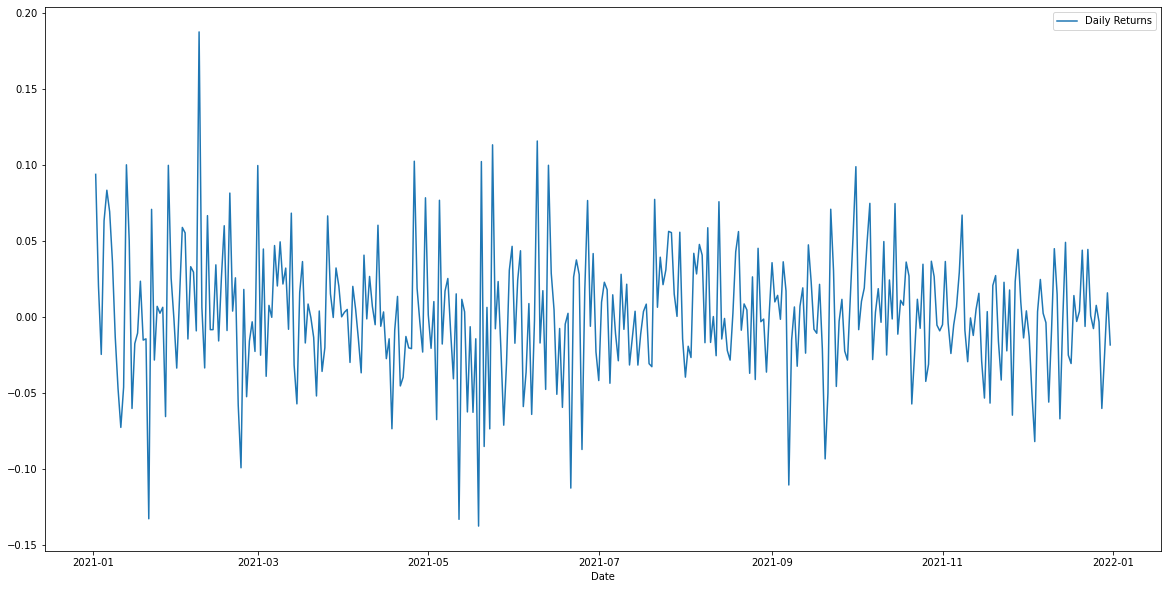

In [14]:
#Plotting daily returns 
btc_dly_ret.plot(figsize = (20,10))

<AxesSubplot:title={'center':'30 day Rolling Average'}, xlabel='Date'>

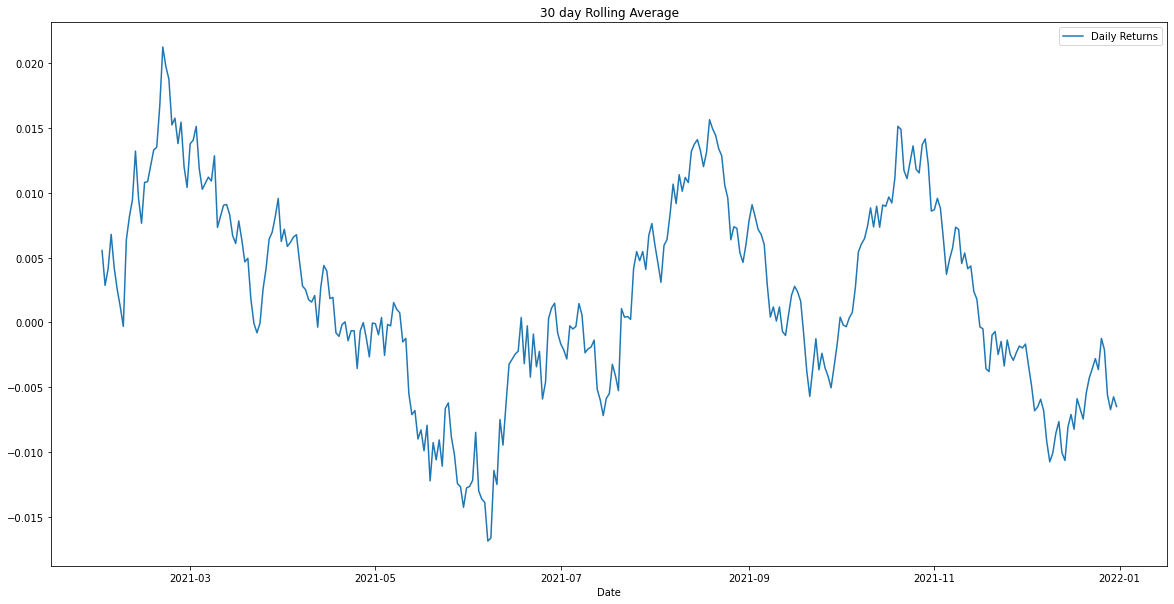

In [15]:
# Monthly average change in prices
MA_btc_daily_ret = btc_dly_ret.rolling(window = 30).mean()

MA_btc_daily_ret.plot(figsize = (20,10), title = '30 day Rolling Average')

<AxesSubplot:xlabel='Date'>

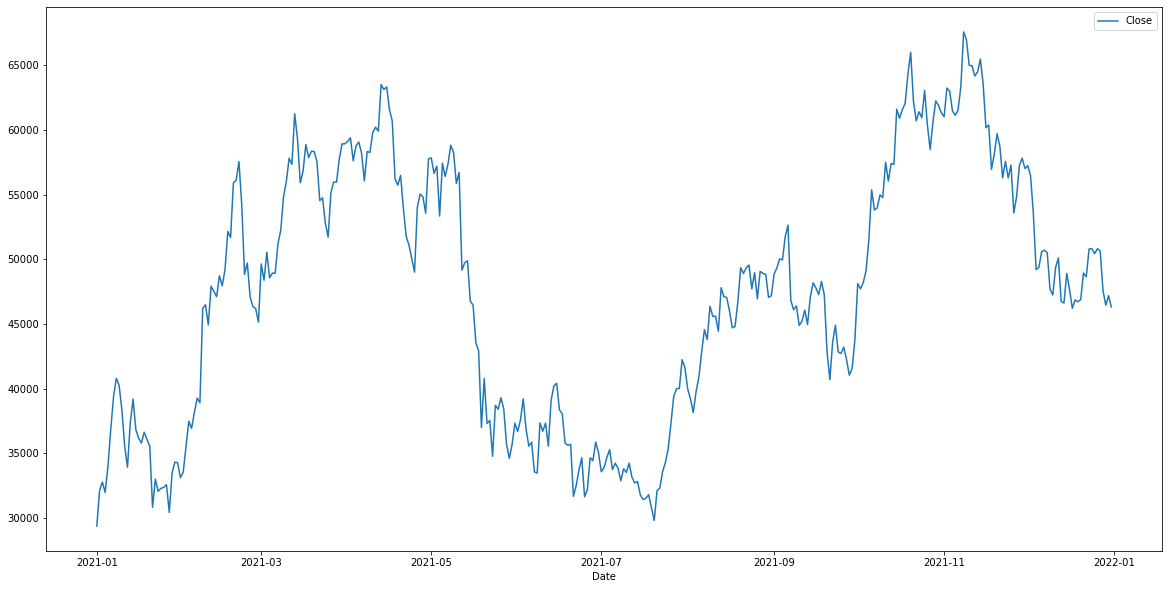

In [16]:
# Plotting bitcoin prices within the period
btc.plot(figsize = (20,10))

array([[<AxesSubplot:title={'center':'Daily Returns'}>]], dtype=object)

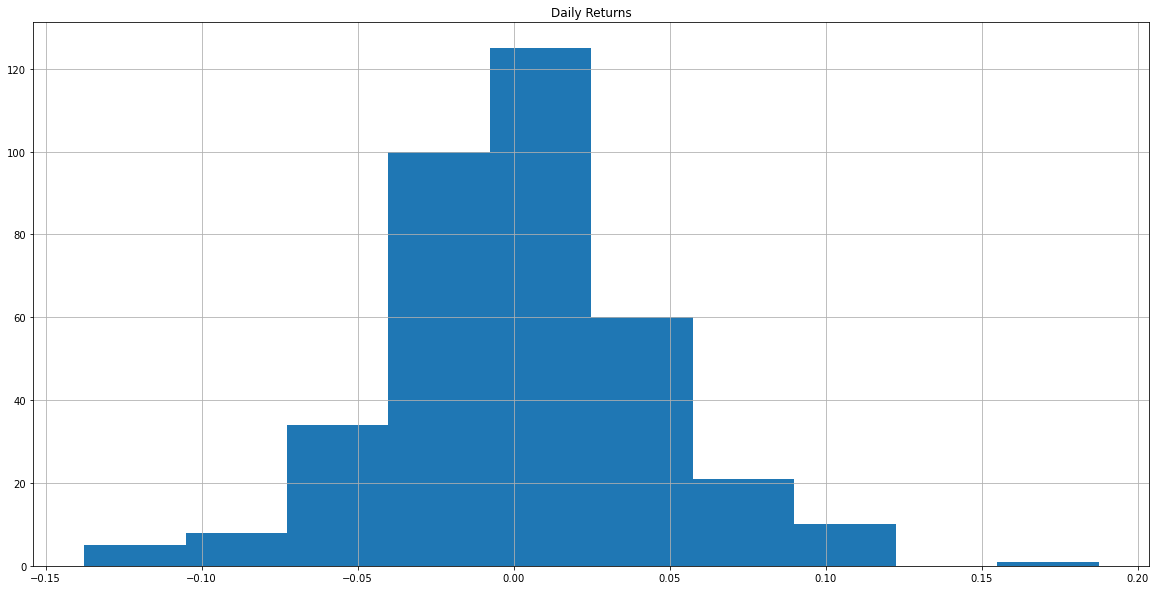

In [17]:
# Plotting dailyreturns in bar diagram
btc_dly_ret.hist(figsize=(20,10))

In [18]:
# Concatenate closing prices and daily returns
combined_btc_data = pd.concat([btc,btc_dly_ret], axis= 'columns', join= "inner")
combined_btc_data.dropna(inplace= True)

In [ ]:
# Saving into a csv file
combined_btc_data.to_csv('combined_bitcoin_data.csv')